(1987.6602666990846,
 -0.9836928809372101,
 'D:\\works\\MG-DSA\\sales_prediction_chart.png')

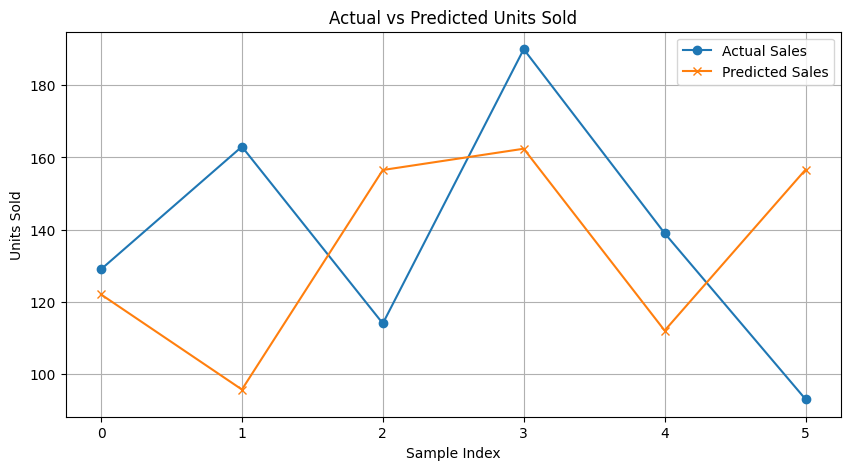

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Simulated sales dataset
np.random.seed(42)
data = {
    'Date': pd.date_range(start='2025-03-01', periods=30, freq='D'),
    'Weather': np.random.choice(['Sunny', 'Rainy'], size=30),
    'Promotion': np.random.choice([0, 1], size=30),
    'Units_Sold': np.random.randint(80, 200, size=30)
}

df = pd.DataFrame(data)
df['Day'] = df['Date'].dt.dayofweek  # 0=Monday, ..., 6=Sunday

# Encode categorical variable 'Weather'
df['Weather_Sunny'] = (df['Weather'] == 'Sunny').astype(int)

# Feature selection
X = df[['Day', 'Promotion', 'Weather_Sunny']]
y = df['Units_Sold']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Visualization
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual Sales', marker='o')
plt.plot(y_pred, label='Predicted Sales', marker='x')
plt.title('Actual vs Predicted Units Sold')
plt.xlabel('Sample Index')
plt.ylabel('Units Sold')
plt.legend()
plt.grid(True)
chart_path = "D:\\works\\MG-DSA\\sales_prediction_chart.png"
plt.savefig(chart_path)

# Output metrics and chart path
mse, r2, chart_path
